### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

14.340762122480598
13.455956364731396
14.956853601270007
14.38275264711665
324


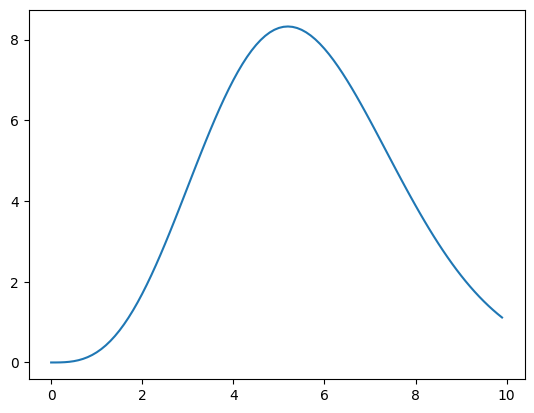

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

N = [10**5, 10**2, 10**3, 10**4]
a = 0
b = 10
sigma = 3
mu = 0
step = 0.1

xgrid = np.arange(a, b, step)
def equation(x):
    return x**3*(2/np.pi)**(1/2)/sigma*np.exp(-(x**2) / (2*sigma**2)) #Our function we are integrating

def answer(x):
    return 4 * sigma ** 4 #an "attempt" at finding the answer of the right hand side


n = 0
while n < len(N):
    pulls = np.random.normal(mu, sigma, N[n])
    pos = pulls >= 0
    pulls = pulls[pos]
    integral = 0
    i = 0
    while i < len(pulls):
        integral += equation(float(pulls[i]))
        i += 1
    print((b-a)/float(N[n])*integral )
    n += 1

print(answer(b-a))
plt.plot(xgrid, equation(xgrid))

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

PDF at x = 145 is: 0.0002954565607958672
Ten random pulls:  [ 93.02596979 110.62414943 104.97612827  93.0039727  108.98271179
 108.10292876  89.99600264 110.59560774 109.33647935 108.86235703]
One in 740.7966946899128 has an IQ > 145
A 1 in a million IQ is:  171.30136463234348


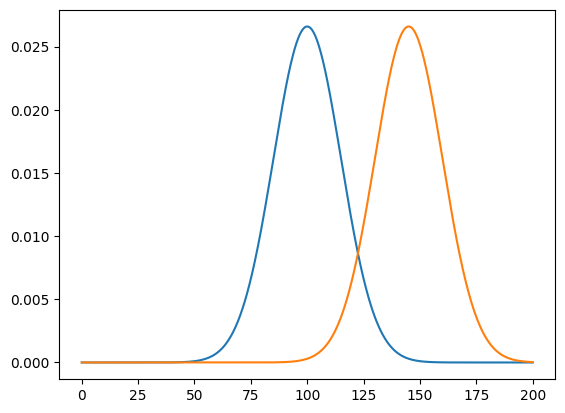

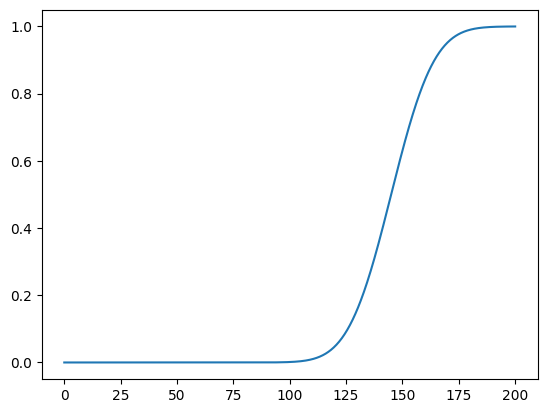

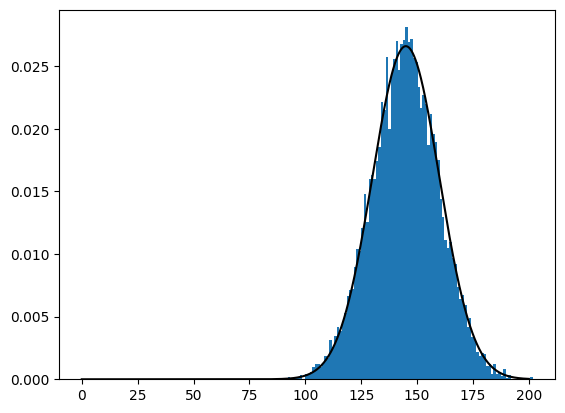

In [125]:
x = np.linspace(0,200,1000)
gauss = stats.norm(100,15)
gauss2 = stats.norm(145,15)
plt.figure(1) #Comparing the first and second gausing at the two mu values
IQ = gauss.pdf(x)
print("PDF at x = 145 is:", gauss.pdf(145))
IQ2 = gauss2.pdf(x)
plt.plot(x,IQ)
plt.plot(x,IQ2)

plt.figure(2) #The CDF of the second gaussing
cdf = gauss2.cdf(x)
plt.plot(x,cdf)

plt.figure(3) #Showing that the histogram fits the guassian
uni = np.random.uniform(0.0,1.0,10000)
inv = gauss2.ppf(uni)
plt.hist(inv, bins=100, density=True)
plt.plot(x,IQ2,color= "black")

pulls = gauss.rvs(10)
number = 1/(1.0- gauss.cdf(145))
print("Ten random pulls: ", pulls)
print("One in %s has an IQ > 145" % number)
print("A 1 in a million IQ is: ", gauss.isf(10**(-6)))

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

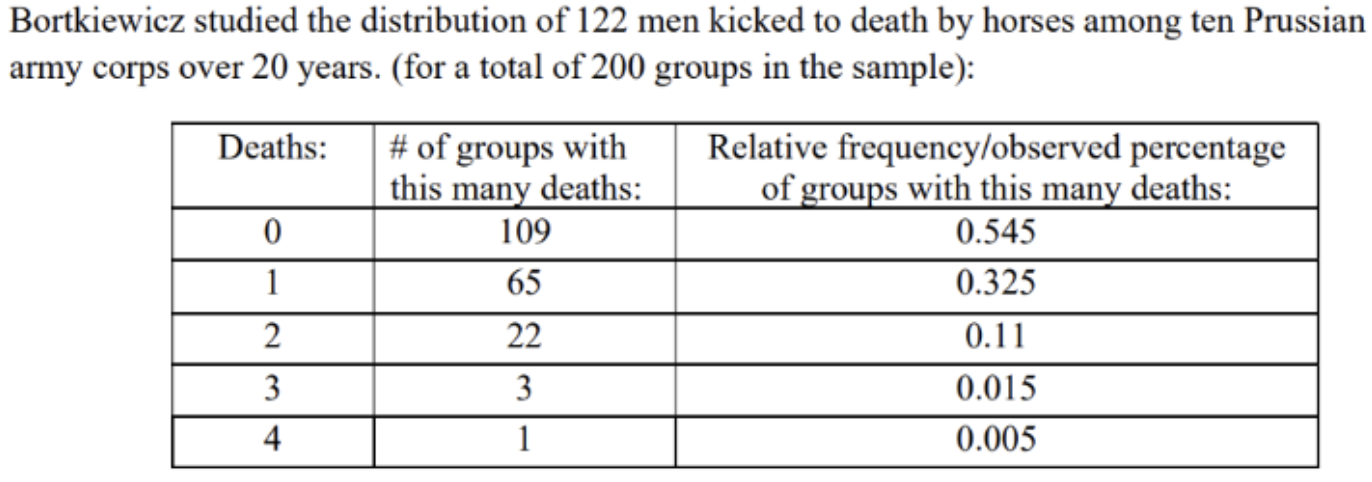

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

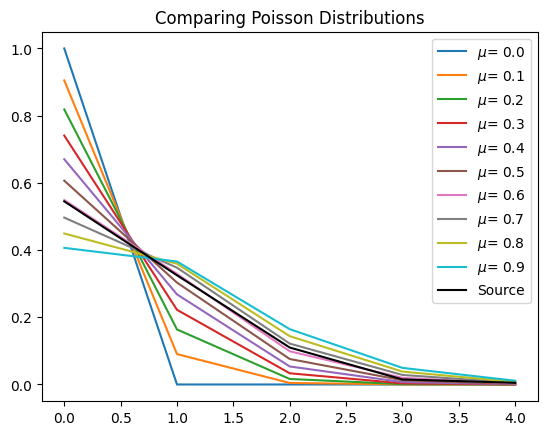

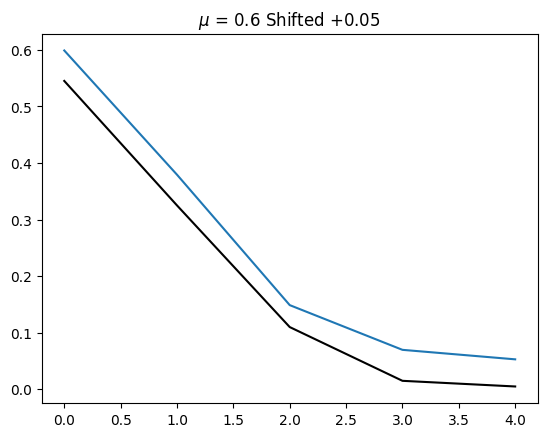

In [86]:
x = [0, 1, 2, 3, 4]
y = [0.545, 0.325, 0.11, 0.015, 0.005]
mu = np.arange(0,1,.1)
for i in mu: #loop so that i can have as many comparisons as i want.
    poi = stats.poisson.pmf(x, i)
    plt.plot(x, poi, label="$\mu$= %s"% round(i,2))
plt.title("Comparing Poisson Distributions")
plt.plot(x,y, color="black", label="Source")
plt.legend()


plt.figure(2)
plt.title("$\mu$ = 0.6 Shifted +0.05")
plt.plot(x,y, color="black")
plt.plot(x, stats.poisson.pmf(x, 0.6)+0.05) #Found that mu = 0.6 was my best fit, so i showed it in another plot and bumped it up by 0.05 so that you can see how they comapare